In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from autosklearn.classification import AutoSklearnClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.io import arff
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


In [2]:
raw_data_file1 = '1year.arff'
raw_data_file2 = '3year.arff'
raw_data_file3 = '5year.arff'
raw_data_path = '../data/01_raw/'

In [3]:
data = arff.loadarff(raw_data_path + raw_data_file2)
# data = arff.loadarff(raw_data_path + raw_data_file2)
# data = arff.loadarff(raw_data_path + raw_data_file3)

In [4]:
df = pd.DataFrame(data[0])
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,0.463590,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,0.539620,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,0.675660,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,0.564530,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,0.584960,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,0.359170,...,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646,b'1'
10499,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,0.370110,...,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276,b'1'
10500,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,0.160460,...,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659,b'1'
10501,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,0.495230,...,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068,b'1'


In [5]:
X = df.drop('class', axis=1)
y = df['class']

#mlb = MultiLabelBinarizer()
#y = mlb.fit_transform(y)
y = y.apply(lambda x: int(x.decode('utf-8')))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
automl = AutoSklearnClassifier(memory_limit = None)
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", accuracy(y_test, y_hat))

Accuracy score 0.9672505712109672


Accuracy score 0.9672505712109672

In [8]:
print(automl.show_models())

{2: {'model_id': 2, 'rank': 1, 'cost': 0.043076923076923124, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fcd3e3fa4a0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fcd3d832c20>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fcd3d833c40>, 'sklearn_classifier': RandomForestClassifier(max_features=8, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)}, 3: {'model_id': 3, 'rank': 2, 'cost': 0.03692307692307695, 'ensemble_weight': 0.22, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fcd3e462ad0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f

{2: {'model_id': 2, 'rank': 1, 'cost': 0.043076923076923124, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fa4f82a00d0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fa4f82a1e70>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fa4f82a1960>, 'sklearn_classifier': RandomForestClassifier(max_features=8, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)}, 3: {'model_id': 3, 'rank': 2, 'cost': 0.03692307692307695, 'ensemble_weight': 0.22, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fa4f951fee0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fa528a4a980>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fa528a4ba30>, 'sklearn_classifier': AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=7),
                   learning_rate=0.4034077156997028, n_estimators=280,
                   random_state=1)}, 5: {'model_id': 5, 'rank': 3, 'cost': 0.03500000000000003, 'ensemble_weight': 0.5, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fa4f82a0250>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fa5289e24d0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fa5289e0190>, 'sklearn_classifier': RandomForestClassifier(criterion='entropy', max_features=43, min_samples_leaf=8,
                       min_samples_split=17, n_estimators=512, n_jobs=1,
                       random_state=1, warm_start=True)}, 14: {'model_id': 14, 'rank': 4, 'cost': 0.038461538461538436, 'ensemble_weight': 0.26, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fa4f82a0190>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fa528f81630>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fa528f819f0>, 'sklearn_classifier': AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.9772078202526538, n_estimators=418,
                   random_state=1)}}

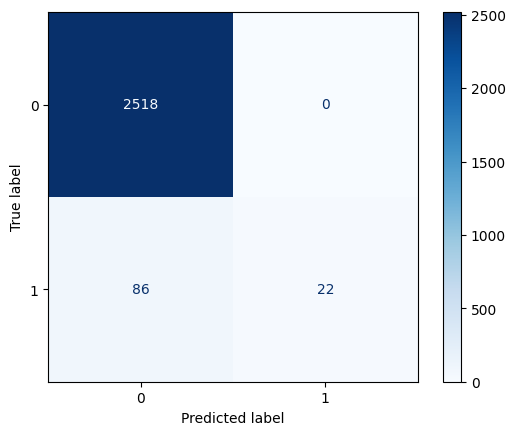

Accuracy:  0.9672505712109672


In [9]:
# Stwórz macierz pomyłek
cm = confusion_matrix(y_test, y_hat)

# Wykreśl macierz pomyłek
plot_confusion_matrix(automl, X_test, y_test, cmap=plt.cm.Blues)

# Wyświetl wykres
plt.show()

# Wyświetl dokładność modelu
accuracy = automl.score(X_test, y_test)
print("Accuracy: ", accuracy)

In [11]:
models_with_weights = automl.get_models_with_weights()

for model, weight in models_with_weights:
    print("Model:", model)
    print("Weight:", weight)
    
    # Sprawdź, które cechy zostały użyte przez model.
    # `model` jest obiektem typu `sklearn.pipeline.Pipeline`, więc możemy użyć metody `get_feature_names_out`:
    if hasattr(model, "get_feature_names_out"):
        print("Features used:", model.get_feature_names_out())
    else:
        print("The model does not provide feature names.")


Model: 0.5
Weight: SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.492569000119347, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 8, 'classifier:random_forest:min_samples_split': 17, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_onl